Use the package provided by: https://github.com/bayesian-optimization/BayesianOptimization
to do multi-dimensional data BO

In [1]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [2]:
#data prep
data_file = "bo_test_pca_df_mono_24.csv"
origin_data = pd.read_csv(data_file, index_col = None)
origin_data.head()


,Unnamed: 0,PC1,PC2,standardised_yield,yield
0,0,2.993404,1.292484,1.498429,0.82
1,1,-0.088412,-1.644992,1.081716,0.72
2,2,7.073370,1.667592,0.998374,0.70
3,3,4.542111,2.017177,0.665004,0.62
4,4,3.072163,-1.591613,0.248291,0.52


In [3]:
#PC1 PC2 are params, std_yield is target
#goal to maximise
data_for_bo_df = pd.DataFrame()
data_for_bo_df[['PC1', 'PC2', 'y']] = origin_data[['PC1', 'PC2', 'standardised_yield']]

In [4]:
data_for_bo_df.head()

,PC1,PC2,y
0,2.993404,1.292484,1.498429
1,-0.088412,-1.644992,1.081716
2,7.073370,1.667592,0.998374
3,4.542111,2.017177,0.665004
4,3.072163,-1.591613,0.248291


In [5]:
PC1 = data_for_bo_df['PC1'].values.tolist()
PC2 = data_for_bo_df['PC2'].values.tolist()
Y = (data_for_bo_df['y']).values.tolist()

In [6]:
PC1_pbound = tuple(data_for_bo_df['PC1'].describe()[['min', 'max']])
PC2_pbound = tuple(data_for_bo_df['PC2'].describe()[['min', 'max']])

In [7]:
from bayes_opt import BayesianOptimization

In [8]:
optimizer = BayesianOptimization(
    f=None,
    pbounds={'PC1': PC1_pbound, 'PC2': PC2_pbound},
    verbose=2,
    random_state=1,
)
optimizer.set_gp_params(alpha=0.5)

In [9]:
#register our data
for pc1, pc2, y in zip(PC1, PC2, Y):
    params = {"PC1" : pc1, "PC2": pc2}
    optimizer.register(params=params, target=y)

# Change Acq function here!

In [140]:
#in this package, utility means aq func

from bayes_opt import UtilityFunction

# utility = UtilityFunction(kind="ucb", kappa=1, xi=0.0)
utility = UtilityFunction(kind="poi", kappa=0.1, xi=1e-2)

(-4.209721501192254, 6.346178730753496)

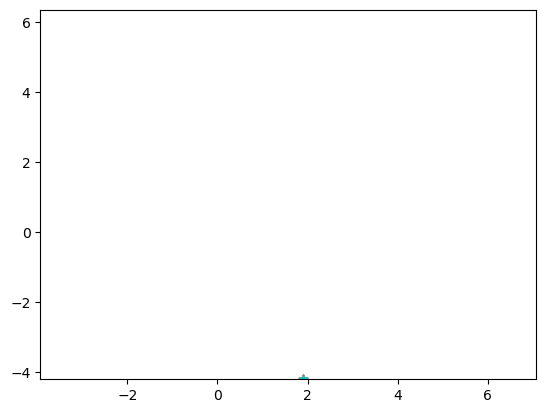

In [141]:
for i in range(20):
    this_res = optimizer.suggest(utility)
    plt.scatter(this_res["PC1"], this_res["PC2"], marker = "*")

plt.xlim(*PC1_pbound)
plt.ylim(*PC2_pbound)
    

In [142]:
res = optimizer.suggest(utility)

res

{'PC1': 1.8957835781870673, 'PC2': -4.209721501192254}

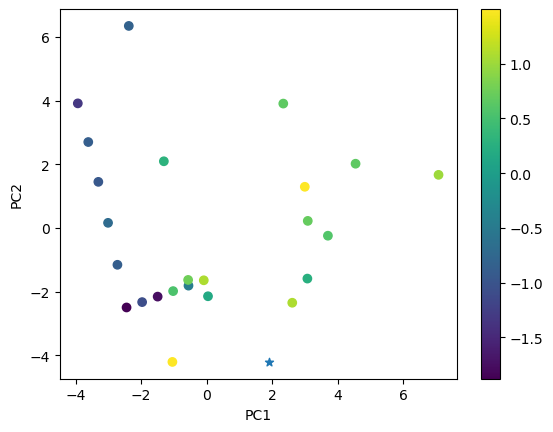

In [143]:
plt.scatter(PC1, PC2, c = Y)
plt.colorbar()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(res["PC1"], res["PC2"], marker = "*")

In [144]:
optimizer.max

{'target': 1.4984287460757888,
 'params': {'PC1': 2.993403898202905, 'PC2': 1.2924838270266477}}

Now we try to plot the utility function

First we create the x's 

we select 100 points

In [145]:
Xpc1, Xpc2 = np.mgrid[PC1_pbound[0]:PC1_pbound[1]:101j, PC2_pbound[0]:PC2_pbound[1]:101j]

In [150]:
#flatten the 2D array into 1D

In [146]:
xpc = [ [xpc1, xpc2] for xpc1, xpc2 in zip(Xpc1.flatten(), Xpc2.flatten())]

In [151]:
#extract the utility function and calculate each value of utility function for linspaced x's

In [147]:
util_flat = utility.utility(xpc, optimizer._gp, optimizer.max['target'])

In [ ]:
#and resh

In [148]:
util = util_flat.reshape(101,101)

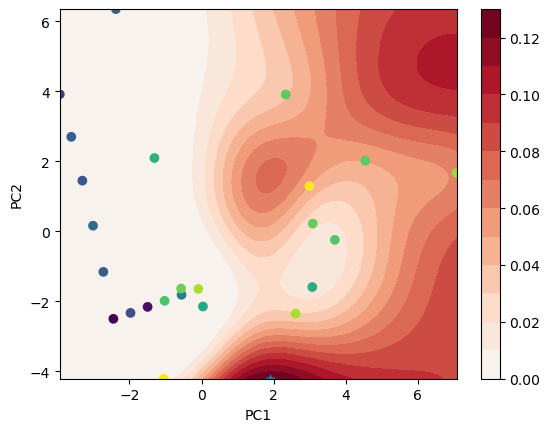

In [149]:
from matplotlib.colors import CenteredNorm
# plt.pcolor(Xpc1, Xpc2, util, cmap='RdBu_r', norm=CenteredNorm())
plt.contourf(Xpc1, Xpc2, util, 15, cmap='RdBu_r', norm=CenteredNorm())
plt.colorbar()

plt.scatter(PC1, PC2, c = Y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(res["PC1"], res["PC2"], marker = "*")